In [8]:
# pip install pandas==1.3.5

In [9]:
import cv2
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import math

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing all the required libraries and packages

In [11]:
validationDirect,trainDirect=[p for p in pathlib.Path("/content/drive/MyDrive/Machine_Learning/Data/Handwritten").iterdir()]
trainFiles=[files for files in trainDirect.iterdir()]
validationFiles=[files for files in validationDirect.iterdir()]

Accessing the dataset of both training and validation

In [12]:
# train_Data=pd.DataFrame()
# for Folders in trainFiles:
#     ProductNo=int(str(Folders)[-1])
#     for files in Folders.iterdir():
#         img=cv2.imread(str(files),0)
#         Pixels=img.ravel()
#         Pixels=np.append(Pixels,ProductNo)
#         train_Data=train_Data.append(pd.Series(Pixels),ignore_index=True)
# train_Data=train_Data.rename(columns={784: "Label"})
# validation_Data=pd.DataFrame()
# for Folders in validationFiles:
#     ProductNo=int(str(Folders)[-1])
#     for files in Folders.iterdir():
#         img=cv2.imread(str(files),0)
#         Pixels=img.ravel()
#         Pixels=np.append(Pixels,ProductNo)
#         validation_Data=validation_Data.append(pd.Series(Pixels),ignore_index=True)
# validation_Data=validation_Data.rename(columns={784: "Label"})

import pandas as pd
import numpy as np
import cv2

# For training data
train_rows = []
for Folders in trainFiles:
    ProductNo = int(str(Folders)[-1])
    for files in Folders.iterdir():
        img = cv2.imread(str(files), 0)
        Pixels = img.ravel()
        Pixels = np.append(Pixels, ProductNo)
        train_rows.append(Pixels)

train_Data = pd.DataFrame(train_rows)
train_Data = train_Data.rename(columns={784: "Label"})  # assuming 28x28 images

# For validation data
validation_rows = []
for Folders in validationFiles:
    ProductNo = int(str(Folders)[-1])
    for files in Folders.iterdir():
        img = cv2.imread(str(files), 0)
        Pixels = img.ravel()
        Pixels = np.append(Pixels, ProductNo)
        validation_rows.append(Pixels)

validation_Data = pd.DataFrame(validation_rows)
validation_Data = validation_Data.rename(columns={784: "Label"})


Converting the images into pixels of Red,Green and Blue and storing those Pixels in a list which is then appended to the DataFrame for both training and validation files

In [13]:
train_Data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
200,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
201,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
202,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [14]:
validation_Data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
446,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
447,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
448,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [15]:
Columns=train_Data.columns
scaler=StandardScaler()
X=train_Data[[col for col in Columns if col!='Label']]
X_train=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
X_validation=pd.DataFrame(data=scaler.transform(validation_Data[X.columns]),columns=X.columns)
y_train=train_Data['Label']
y_validation=validation_Data['Label']

Scaling down all the pixel values using Standard Scaler to decrease computing power and hence reduce time latency for the algorithms to be tested

In [16]:
AlgorithmsList=[]
AccuracyList=[]

Declaring two lists for names of algorithms in use and their accuracy achieved.

Using our first algorithm Gaussian Naive Bayes which assumes that all of the attributes are independent of each other and all of them follow the Normal Distribution.
The accurracy obtained is 63 percent as shown when tested on our validation dataset

In [17]:
decreaseList=[]
for i in range(0,21):
    decreaseList.append(round(i*0.05,2))
print(decreaseList)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


A decrease List is made to be further used

In [18]:
param_grid = {'min_samples_split': range(2,20),'min_impurity_decrease':decreaseList,'criterion':['entropy','gini']}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,cv = 3,verbose=10)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits
[CV 1/3; 1/756] START criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2
[CV 1/3; 1/756] END criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2;, score=0.676 total time=   0.0s
[CV 2/3; 1/756] START criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2
[CV 2/3; 1/756] END criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2;, score=0.794 total time=   0.0s
[CV 3/3; 1/756] START criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2
[CV 3/3; 1/756] END criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2;, score=0.765 total time=   0.0s
[CV 1/3; 2/756] START criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3
[CV 1/3; 2/756] END criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3;, score=0.662 total time=   0.0s
[CV 2/3; 2/756] START criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3
[CV 2/3; 2/756] END 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.15, 0.2,
                                                   0.25, 0.3, 0.35, 0.4, 0.45,
                                                   0.5, 0.55, 0.6, 0.65, 0.7,
                                                   0.75, 0.8, 0.85, 0.9, 0.95,
                                                   1.0],
                         'min_samples_split': range(2, 20)},
             verbose=10)

Decision Tree is an algorithm which uses the concept of entropy and impurity to split the data into parts until the conditions aren't satisfied.
During predictions all the conditions are checked like traversing through a binary tree and the output is hence predicted.
Running a grid search on the decision Tree algorithm and trying out all possible combinations of the hyperparameters min sample split ,min sample leaf and min impurity decrease to tune the algorithm and to prevent overfitting.
Stratified Cross validation is used to find the best fit of the model.

In [19]:
print("The accuracy obtained from Decision Tree is"+str(grid_search.score(X_validation,y_validation)))
print("The best estimator is "+str(grid_search.best_estimator_))

The accuracy obtained from Decision Tree is0.6733333333333333
The best estimator is DecisionTreeClassifier(criterion='entropy', random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,  # OK
    min_samples_leaf=1,
    min_samples_split=3,
    min_weight_fraction_leaf=0.0,
    random_state=42,
    splitter='best'
)

dt.fit(X_train, y_train)

AlgorithmsList.append("DT")
AccuracyList.append(dt.score(X_validation, y_validation))


The accuracy obtained is around 80 percent and the best estimator is as above

Storing the best estimator in dt and the algorithm in algo list and also the accuracy in acc list

In [22]:
neight = KNeighborsClassifier()
length=int(math.sqrt(X_train.shape[0]))
parameters={'n_neighbors':([i for i in range(2,50)]), 'algorithm':['auto','ball_tree','kd_tree','brute'],
            'weights':['uniform','distance']}
clf = GridSearchCV(neight, parameters,verbose=10,cv=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV 1/3; 1/384] START algorithm=auto, n_neighbors=2, weights=uniform............
[CV 1/3; 1/384] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.618 total time=   0.1s
[CV 2/3; 1/384] START algorithm=auto, n_neighbors=2, weights=uniform............
[CV 2/3; 1/384] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.735 total time=   0.1s
[CV 3/3; 1/384] START algorithm=auto, n_neighbors=2, weights=uniform............
[CV 3/3; 1/384] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.662 total time=   0.1s
[CV 1/3; 2/384] START algorithm=auto, n_neighbors=2, weights=distance...........
[CV 1/3; 2/384] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.721 total time=   0.0s
[CV 2/3; 2/384] START algorithm=auto, n_neighbors=2, weights=distance...........
[CV 2/3; 2/384] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.765 total time=   0.0s
[CV 3/3; 2/384] START algorit

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'weights': ['uniform', 'distance']},
             verbose=10)

In [23]:
print("The best estimator is "+str(clf.best_estimator_))
acc=clf.score(X_validation,y_validation)
print("The validation score obtained is "+str(acc))

The best estimator is KNeighborsClassifier(n_neighbors=2, weights='distance')
The validation score obtained is 0.6666666666666666


In [24]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
knn.fit(X_train,y_train)
AlgorithmsList.append("Knn")
AccuracyList.append(knn.score(X_validation,y_validation))

In [25]:
Bayes=GaussianNB()
Bayes.fit(X_train,y_train)
AlgorithmsList.append("NB")
accuracy=Bayes.score(X_validation,y_validation)
AccuracyList.append(accuracy)
print("The accuracy obtained from GaussianNaive Bayes is "+str(accuracy))

The accuracy obtained from GaussianNaive Bayes is 0.7288888888888889


In [26]:
param_grid = {'n_estimators': [10,30,50,70,85,100,120,130,140,150,200],'min_impurity_decrease':decreaseList,'criterion':['entropy','gini']}
rf =RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,verbose=10)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 462 candidates, totalling 1386 fits
[CV 1/3; 1/462] START criterion=entropy, min_impurity_decrease=0.0, n_estimators=10
[CV 1/3; 1/462] END criterion=entropy, min_impurity_decrease=0.0, n_estimators=10;, score=0.838 total time=   0.0s
[CV 2/3; 1/462] START criterion=entropy, min_impurity_decrease=0.0, n_estimators=10
[CV 2/3; 1/462] END criterion=entropy, min_impurity_decrease=0.0, n_estimators=10;, score=0.853 total time=   0.0s
[CV 3/3; 1/462] START criterion=entropy, min_impurity_decrease=0.0, n_estimators=10
[CV 3/3; 1/462] END criterion=entropy, min_impurity_decrease=0.0, n_estimators=10;, score=0.838 total time=   0.0s
[CV 1/3; 2/462] START criterion=entropy, min_impurity_decrease=0.0, n_estimators=30
[CV 1/3; 2/462] END criterion=entropy, min_impurity_decrease=0.0, n_estimators=30;, score=0.882 total time=   0.1s
[CV 2/3; 2/462] START criterion=entropy, min_impurity_decrease=0.0, n_estimators=30
[CV 2/3; 2/462] END criterion=entropy, min_impurity_decr

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.15, 0.2,
                                                   0.25, 0.3, 0.35, 0.4, 0.45,
                                                   0.5, 0.55, 0.6, 0.65, 0.7,
                                                   0.75, 0.8, 0.85, 0.9, 0.95,
                                                   1.0],
                         'n_estimators': [10, 30, 50, 70, 85, 100, 120, 130,
                                          140, 150, 200]},
             verbose=10)

Similar to the above process running a grid search on random forest to find the best fit of the model.
Random Forest is an algorithm which makes n number of trees and gives the data to all the trees to predict.
The predictions are the mode of all the predictions predicted from the trees and this approach is also called as ensemble approach.
Here min sample split,number of trees and minimum impurity decease is considered.
Stratified cross validation is used to.

In [27]:
print("The accuracy obtained from Random Forest is "+str(grid_search.score(X_validation,y_validation)))
print("The best estimator is "+str(grid_search.best_estimator_))

The accuracy obtained from Random Forest is 0.7688888888888888
The best estimator is RandomForestClassifier(n_estimators=200, random_state=42)


The accuracy obtained from Random Forest is 84 percent and the best estimator is as above

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',  # Replaces deprecated 'auto'
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=130,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False
)

rf.fit(X_train, y_train)
AlgorithmsList.append("RF")
AccuracyList.append(rf.score(X_validation, y_validation))


Storing the best estimator in rf and the algorithm and accuracy

The best estimator is as above and the score is around 88.5 percent

In [32]:
lr=LogisticRegression(random_state=42)
parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'tol':[1e-4,1e-3,1e-2,1e-1,0.12,0.13,0.14,0.15
            ,0.16,0.25,0.35],'C':[0.001,0.01,0.1,0.2,0.3,0.4,0.45,0.5,0.55]}
clf = GridSearchCV(lr, parameters,verbose=10,cv=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 495 candidates, totalling 1485 fits
[CV 1/3; 1/495] START C=0.001, solver=newton-cg, tol=0.0001.....................
[CV 1/3; 1/495] END C=0.001, solver=newton-cg, tol=0.0001;, score=0.926 total time=   0.1s
[CV 2/3; 1/495] START C=0.001, solver=newton-cg, tol=0.0001.....................
[CV 2/3; 1/495] END C=0.001, solver=newton-cg, tol=0.0001;, score=0.956 total time=   0.1s
[CV 3/3; 1/495] START C=0.001, solver=newton-cg, tol=0.0001.....................
[CV 3/3; 1/495] END C=0.001, solver=newton-cg, tol=0.0001;, score=0.941 total time=   0.1s
[CV 1/3; 2/495] START C=0.001, solver=newton-cg, tol=0.001......................
[CV 1/3; 2/495] END C=0.001, solver=newton-cg, tol=0.001;, score=0.926 total time=   0.0s
[CV 2/3; 2/495] START C=0.001, solver=newton-cg, tol=0.001......................
[CV 2/3; 2/495] END C=0.001, solver=newton-cg, tol=0.001;, score=0.956 total time=   0.0s
[CV 3/3; 2/495] START C=0.001, solver=newton-cg, tol=0.001....................

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 89/495] END C=0.01, solver=sag, tol=0.0001;, score=0.941 total time=   0.8s
[CV 2/3; 89/495] START C=0.01, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 89/495] END C=0.01, solver=sag, tol=0.0001;, score=0.985 total time=   0.4s
[CV 3/3; 89/495] START C=0.01, solver=sag, tol=0.0001...........................
[CV 3/3; 89/495] END C=0.01, solver=sag, tol=0.0001;, score=0.926 total time=   0.2s
[CV 1/3; 90/495] START C=0.01, solver=sag, tol=0.001............................
[CV 1/3; 90/495] END C=0.01, solver=sag, tol=0.001;, score=0.941 total time=   0.1s
[CV 2/3; 90/495] START C=0.01, solver=sag, tol=0.001............................
[CV 2/3; 90/495] END C=0.01, solver=sag, tol=0.001;, score=0.985 total time=   0.1s
[CV 3/3; 90/495] START C=0.01, solver=sag, tol=0.001............................
[CV 3/3; 90/495] END C=0.01, solver=sag, tol=0.001;, score=0.926 total time=   0.1s
[CV 1/3; 91/495] START C=0.01, solver=sag, tol=0.01.............................
[CV 1/3; 91/495] END C=0.01, solver=sag, tol=0.01;, score=0.941 total time=   0.0s
[CV 2/3; 91/495] START C=0.01, solver=sag, tol=0.01.............................
[CV 2/3; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 144/495] END C=0.1, solver=sag, tol=0.0001;, score=0.941 total time=   0.2s
[CV 2/3; 144/495] START C=0.1, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 144/495] END C=0.1, solver=sag, tol=0.0001;, score=0.985 total time=   0.2s
[CV 3/3; 144/495] START C=0.1, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 144/495] END C=0.1, solver=sag, tol=0.0001;, score=0.926 total time=   0.2s
[CV 1/3; 145/495] START C=0.1, solver=sag, tol=0.001............................
[CV 1/3; 145/495] END C=0.1, solver=sag, tol=0.001;, score=0.941 total time=   0.2s
[CV 2/3; 145/495] START C=0.1, solver=sag, tol=0.001............................
[CV 2/3; 145/495] END C=0.1, solver=sag, tol=0.001;, score=0.985 total time=   0.2s
[CV 3/3; 145/495] START C=0.1, solver=sag, tol=0.001............................
[CV 3/3; 145/495] END C=0.1, solver=sag, tol=0.001;, score=0.926 total time=   0.2s
[CV 1/3; 146/495] START C=0.1, solver=sag, tol=0.01.............................
[CV 1/3; 146/495] END C=0.1, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 146/495] START C=0.1, solver=sag, tol=0.01.............................
[CV 2/3; 146/495] END C=0.1, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 146/495] START C=0.1, solver=sag, tol=0.01.............................
[CV 3/3; 14

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 155/495] END C=0.1, solver=saga, tol=0.0001;, score=0.941 total time=   0.5s
[CV 2/3; 155/495] START C=0.1, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 155/495] END C=0.1, solver=saga, tol=0.0001;, score=0.985 total time=   0.5s
[CV 3/3; 155/495] START C=0.1, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 155/495] END C=0.1, solver=saga, tol=0.0001;, score=0.926 total time=   0.5s
[CV 1/3; 156/495] START C=0.1, solver=saga, tol=0.001...........................
[CV 1/3; 156/495] END C=0.1, solver=saga, tol=0.001;, score=0.941 total time=   0.5s
[CV 2/3; 156/495] START C=0.1, solver=saga, tol=0.001...........................
[CV 2/3; 156/495] END C=0.1, solver=saga, tol=0.001;, score=0.985 total time=   0.5s
[CV 3/3; 156/495] START C=0.1, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 156/495] END C=0.1, solver=saga, tol=0.001;, score=0.926 total time=   0.5s
[CV 1/3; 157/495] START C=0.1, solver=saga, tol=0.01............................
[CV 1/3; 157/495] END C=0.1, solver=saga, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 157/495] START C=0.1, solver=saga, tol=0.01............................
[CV 2/3; 157/495] END C=0.1, solver=saga, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 157/495] START C=0.1, solver=saga, tol=0.01............................
[CV 3/3; 157/495] END C=0.1, solver=saga, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 158/495] START C=0.1, solver=saga, tol=0.1.............................
[CV 1/3; 158/495] END C=0.1, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 158/495] START C=0.1, solver=saga, tol=0.1.............................
[CV 2/3; 158/495] END C=0.1, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 158/495] START C=0.1, solver=saga, tol=0.1.............................
[CV 3/3; 15

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 199/495] END C=0.2, solver=sag, tol=0.0001;, score=0.941 total time=   0.2s
[CV 2/3; 199/495] START C=0.2, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 199/495] END C=0.2, solver=sag, tol=0.0001;, score=0.985 total time=   0.2s
[CV 3/3; 199/495] START C=0.2, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 199/495] END C=0.2, solver=sag, tol=0.0001;, score=0.926 total time=   0.2s
[CV 1/3; 200/495] START C=0.2, solver=sag, tol=0.001............................
[CV 1/3; 200/495] END C=0.2, solver=sag, tol=0.001;, score=0.941 total time=   0.2s
[CV 2/3; 200/495] START C=0.2, solver=sag, tol=0.001............................
[CV 2/3; 200/495] END C=0.2, solver=sag, tol=0.001;, score=0.985 total time=   0.2s
[CV 3/3; 200/495] START C=0.2, solver=sag, tol=0.001............................
[CV 3/3; 200/495] END C=0.2, solver=sag, tol=0.001;, score=0.926 total time=   0.2s
[CV 1/3; 201/495] START C=0.2, solver=sag, tol=0.01.............................
[CV 1/3; 201/495] END C=0.2, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 201/495] START C=0.2, solver=sag, tol=0.01.............................
[CV 2/3; 201/495] END C=0.2, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 201/495] START C=0.2, solver=sag, tol=0.01.............................
[CV 3/3; 20

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 210/495] END C=0.2, solver=saga, tol=0.0001;, score=0.941 total time=   0.3s
[CV 2/3; 210/495] START C=0.2, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 210/495] END C=0.2, solver=saga, tol=0.0001;, score=0.985 total time=   0.3s
[CV 3/3; 210/495] START C=0.2, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 210/495] END C=0.2, solver=saga, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 211/495] START C=0.2, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 211/495] END C=0.2, solver=saga, tol=0.001;, score=0.941 total time=   0.3s
[CV 2/3; 211/495] START C=0.2, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 211/495] END C=0.2, solver=saga, tol=0.001;, score=0.985 total time=   0.3s
[CV 3/3; 211/495] START C=0.2, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 211/495] END C=0.2, solver=saga, tol=0.001;, score=0.926 total time=   0.3s
[CV 1/3; 212/495] START C=0.2, solver=saga, tol=0.01............................
[CV 1/3; 212/495] END C=0.2, solver=saga, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 212/495] START C=0.2, solver=saga, tol=0.01............................
[CV 2/3; 212/495] END C=0.2, solver=saga, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 212/495] START C=0.2, solver=saga, tol=0.01............................
[CV 3/3; 212/495] END C=0.2, solver=saga, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 213/495] START C=0.2, solver=saga, tol=0.1.............................
[CV 1/3; 213/495] END C=0.2, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 213/495] START C=0.2, solver=saga, tol=0.1.............................
[CV 2/3; 213/495] END C=0.2, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 213/495] START C=0.2, solver=saga, tol=0.1.............................
[CV 3/3; 21

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 254/495] END C=0.3, solver=sag, tol=0.0001;, score=0.941 total time=   0.4s
[CV 2/3; 254/495] START C=0.3, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 254/495] END C=0.3, solver=sag, tol=0.0001;, score=0.985 total time=   0.4s
[CV 3/3; 254/495] START C=0.3, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 254/495] END C=0.3, solver=sag, tol=0.0001;, score=0.926 total time=   0.4s
[CV 1/3; 255/495] START C=0.3, solver=sag, tol=0.001............................
[CV 1/3; 255/495] END C=0.3, solver=sag, tol=0.001;, score=0.941 total time=   0.4s
[CV 2/3; 255/495] START C=0.3, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 255/495] END C=0.3, solver=sag, tol=0.001;, score=0.985 total time=   0.4s
[CV 3/3; 255/495] START C=0.3, solver=sag, tol=0.001............................
[CV 3/3; 255/495] END C=0.3, solver=sag, tol=0.001;, score=0.926 total time=   0.4s
[CV 1/3; 256/495] START C=0.3, solver=sag, tol=0.01.............................
[CV 1/3; 256/495] END C=0.3, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 256/495] START C=0.3, solver=sag, tol=0.01.............................
[CV 2/3; 256/495] END C=0.3, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 256/495] START C=0.3, solver=sag, tol=0.01.............................
[CV 3/3; 256/495] END C=0.3, solver=sag, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 257/495] START C=0.3, solver=sag, tol=0.1..............................
[CV 1/3; 257/495] END C=0.3, solver=sag, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 257/495] START C=0.3, solver=sag, tol=0.1..............................
[CV 2/3; 257/49

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 265/495] END C=0.3, solver=saga, tol=0.0001;, score=0.941 total time=   0.3s
[CV 2/3; 265/495] START C=0.3, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 265/495] END C=0.3, solver=saga, tol=0.0001;, score=0.985 total time=   0.3s
[CV 3/3; 265/495] START C=0.3, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 265/495] END C=0.3, solver=saga, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 266/495] START C=0.3, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 266/495] END C=0.3, solver=saga, tol=0.001;, score=0.941 total time=   0.3s
[CV 2/3; 266/495] START C=0.3, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 266/495] END C=0.3, solver=saga, tol=0.001;, score=0.985 total time=   0.3s
[CV 3/3; 266/495] START C=0.3, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 266/495] END C=0.3, solver=saga, tol=0.001;, score=0.926 total time=   0.3s
[CV 1/3; 267/495] START C=0.3, solver=saga, tol=0.01............................
[CV 1/3; 267/495] END C=0.3, solver=saga, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 267/495] START C=0.3, solver=saga, tol=0.01............................
[CV 2/3; 267/495] END C=0.3, solver=saga, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 267/495] START C=0.3, solver=saga, tol=0.01............................
[CV 3/3; 267/495] END C=0.3, solver=saga, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 268/495] START C=0.3, solver=saga, tol=0.1.............................
[CV 1/3; 268/495] END C=0.3, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 268/495] START C=0.3, solver=saga, tol=0.1.............................
[CV 2/3; 268/495] END C=0.3, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 268/495] START C=0.3, solver=saga, tol=0.1.............................
[CV 3/3; 26

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 309/495] END C=0.4, solver=sag, tol=0.0001;, score=0.941 total time=   0.2s
[CV 2/3; 309/495] START C=0.4, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 309/495] END C=0.4, solver=sag, tol=0.0001;, score=0.985 total time=   0.2s
[CV 3/3; 309/495] START C=0.4, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 309/495] END C=0.4, solver=sag, tol=0.0001;, score=0.926 total time=   0.2s
[CV 1/3; 310/495] START C=0.4, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 310/495] END C=0.4, solver=sag, tol=0.001;, score=0.941 total time=   0.3s
[CV 2/3; 310/495] START C=0.4, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 310/495] END C=0.4, solver=sag, tol=0.001;, score=0.985 total time=   0.2s
[CV 3/3; 310/495] START C=0.4, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 310/495] END C=0.4, solver=sag, tol=0.001;, score=0.926 total time=   0.2s
[CV 1/3; 311/495] START C=0.4, solver=sag, tol=0.01.............................
[CV 1/3; 311/495] END C=0.4, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 311/495] START C=0.4, solver=sag, tol=0.01.............................
[CV 2/3; 311/495] END C=0.4, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 311/495] START C=0.4, solver=sag, tol=0.01.............................
[CV 3/3; 311/495] END C=0.4, solver=sag, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 312/495] START C=0.4, solver=sag, tol=0.1..............................
[CV 1/3; 312/495] END C=0.4, solver=sag, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 312/495] START C=0.4, solver=sag, tol=0.1..............................
[CV 2/3; 312/495] END C=0.4, solver=sag, tol=0.1;, score=0.971 total time=   0.0s
[CV 3/3; 312/495] START C=0.4, solver=sag, tol=0.1..............................
[CV 3/3; 312/495]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 320/495] END C=0.4, solver=saga, tol=0.0001;, score=0.941 total time=   0.3s
[CV 2/3; 320/495] START C=0.4, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 320/495] END C=0.4, solver=saga, tol=0.0001;, score=0.985 total time=   0.3s
[CV 3/3; 320/495] START C=0.4, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 320/495] END C=0.4, solver=saga, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 321/495] START C=0.4, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 321/495] END C=0.4, solver=saga, tol=0.001;, score=0.941 total time=   0.3s
[CV 2/3; 321/495] START C=0.4, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 321/495] END C=0.4, solver=saga, tol=0.001;, score=0.985 total time=   0.3s
[CV 3/3; 321/495] START C=0.4, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 321/495] END C=0.4, solver=saga, tol=0.001;, score=0.926 total time=   0.3s
[CV 1/3; 322/495] START C=0.4, solver=saga, tol=0.01............................
[CV 1/3; 322/495] END C=0.4, solver=saga, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 322/495] START C=0.4, solver=saga, tol=0.01............................
[CV 2/3; 322/495] END C=0.4, solver=saga, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 322/495] START C=0.4, solver=saga, tol=0.01............................
[CV 3/3; 322/495] END C=0.4, solver=saga, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 323/495] START C=0.4, solver=saga, tol=0.1.............................
[CV 1/3; 323/495] END C=0.4, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 323/495] START C=0.4, solver=saga, tol=0.1.............................
[CV 2/3; 323/495] END C=0.4, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 323/495] START C=0.4, solver=saga, tol=0.1.............................
[CV 3/3; 32

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 364/495] END C=0.45, solver=sag, tol=0.0001;, score=0.941 total time=   0.2s
[CV 2/3; 364/495] START C=0.45, solver=sag, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 364/495] END C=0.45, solver=sag, tol=0.0001;, score=0.985 total time=   0.2s
[CV 3/3; 364/495] START C=0.45, solver=sag, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 364/495] END C=0.45, solver=sag, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 365/495] START C=0.45, solver=sag, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 365/495] END C=0.45, solver=sag, tol=0.001;, score=0.941 total time=   0.2s
[CV 2/3; 365/495] START C=0.45, solver=sag, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 365/495] END C=0.45, solver=sag, tol=0.001;, score=0.985 total time=   0.2s
[CV 3/3; 365/495] START C=0.45, solver=sag, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 365/495] END C=0.45, solver=sag, tol=0.001;, score=0.926 total time=   0.2s
[CV 1/3; 366/495] START C=0.45, solver=sag, tol=0.01............................
[CV 1/3; 366/495] END C=0.45, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 366/495] START C=0.45, solver=sag, tol=0.01............................
[CV 2/3; 366/495] END C=0.45, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 366/495] START C=0.45, solver=sag, tol=0.01............................
[CV 3/3; 366/495] END C=0.45, solver=sag, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 367/495] START C=0.45, solver=sag, tol=0.1.............................
[CV 1/3; 367/495] END C=0.45, solver=sag, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 367/495] START C=0.45, solver=sag, tol=0.1.............................
[CV 2/3; 367/495] END C=0.45, solver=sag, tol=0.1;, score=0.971 total time=   0.0s
[CV 3/3; 367/495] START C=0.45, solver=sag, tol=0.1.............................
[CV 3/3; 36

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 375/495] END C=0.45, solver=saga, tol=0.0001;, score=0.941 total time=   0.3s
[CV 2/3; 375/495] START C=0.45, solver=saga, tol=0.0001.........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 375/495] END C=0.45, solver=saga, tol=0.0001;, score=0.985 total time=   0.3s
[CV 3/3; 375/495] START C=0.45, solver=saga, tol=0.0001.........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 375/495] END C=0.45, solver=saga, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 376/495] START C=0.45, solver=saga, tol=0.001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 376/495] END C=0.45, solver=saga, tol=0.001;, score=0.941 total time=   0.3s
[CV 2/3; 376/495] START C=0.45, solver=saga, tol=0.001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 376/495] END C=0.45, solver=saga, tol=0.001;, score=0.985 total time=   0.3s
[CV 3/3; 376/495] START C=0.45, solver=saga, tol=0.001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 376/495] END C=0.45, solver=saga, tol=0.001;, score=0.926 total time=   0.3s
[CV 1/3; 377/495] START C=0.45, solver=saga, tol=0.01...........................
[CV 1/3; 377/495] END C=0.45, solver=saga, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 377/495] START C=0.45, solver=saga, tol=0.01...........................
[CV 2/3; 377/495] END C=0.45, solver=saga, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 377/495] START C=0.45, solver=saga, tol=0.01...........................
[CV 3/3; 377/495] END C=0.45, solver=saga, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 378/495] START C=0.45, solver=saga, tol=0.1............................
[CV 1/3; 378/495] END C=0.45, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 378/495] START C=0.45, solver=saga, tol=0.1............................
[CV 2/3; 378/495] END C=0.45, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 378/495] START C=0.45, solver=saga, tol=0.1............................
[CV 3

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 419/495] END C=0.5, solver=sag, tol=0.0001;, score=0.941 total time=   0.2s
[CV 2/3; 419/495] START C=0.5, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 419/495] END C=0.5, solver=sag, tol=0.0001;, score=0.985 total time=   0.3s
[CV 3/3; 419/495] START C=0.5, solver=sag, tol=0.0001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 419/495] END C=0.5, solver=sag, tol=0.0001;, score=0.926 total time=   0.2s
[CV 1/3; 420/495] START C=0.5, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 420/495] END C=0.5, solver=sag, tol=0.001;, score=0.941 total time=   0.2s
[CV 2/3; 420/495] START C=0.5, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 420/495] END C=0.5, solver=sag, tol=0.001;, score=0.985 total time=   0.2s
[CV 3/3; 420/495] START C=0.5, solver=sag, tol=0.001............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 420/495] END C=0.5, solver=sag, tol=0.001;, score=0.926 total time=   0.2s
[CV 1/3; 421/495] START C=0.5, solver=sag, tol=0.01.............................
[CV 1/3; 421/495] END C=0.5, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 421/495] START C=0.5, solver=sag, tol=0.01.............................
[CV 2/3; 421/495] END C=0.5, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 421/495] START C=0.5, solver=sag, tol=0.01.............................
[CV 3/3; 421/495] END C=0.5, solver=sag, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 422/495] START C=0.5, solver=sag, tol=0.1..............................
[CV 1/3; 422/495] END C=0.5, solver=sag, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 422/495] START C=0.5, solver=sag, tol=0.1..............................
[CV 2/3; 422/495] END C=0.5, solver=sag, tol=0.1;, score=0.971 total time=   0.0s
[CV 3/3; 422/495] START C=0.5, solver=sag, tol=0.1..............................
[CV 3/3; 422/495]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 430/495] END C=0.5, solver=saga, tol=0.0001;, score=0.941 total time=   0.5s
[CV 2/3; 430/495] START C=0.5, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 430/495] END C=0.5, solver=saga, tol=0.0001;, score=0.985 total time=   0.5s
[CV 3/3; 430/495] START C=0.5, solver=saga, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 430/495] END C=0.5, solver=saga, tol=0.0001;, score=0.926 total time=   0.5s
[CV 1/3; 431/495] START C=0.5, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 431/495] END C=0.5, solver=saga, tol=0.001;, score=0.941 total time=   0.5s
[CV 2/3; 431/495] START C=0.5, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 431/495] END C=0.5, solver=saga, tol=0.001;, score=0.985 total time=   0.5s
[CV 3/3; 431/495] START C=0.5, solver=saga, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 431/495] END C=0.5, solver=saga, tol=0.001;, score=0.926 total time=   0.5s
[CV 1/3; 432/495] START C=0.5, solver=saga, tol=0.01............................
[CV 1/3; 432/495] END C=0.5, solver=saga, tol=0.01;, score=0.941 total time=   0.2s
[CV 2/3; 432/495] START C=0.5, solver=saga, tol=0.01............................
[CV 2/3; 432/495] END C=0.5, solver=saga, tol=0.01;, score=0.985 total time=   0.2s
[CV 3/3; 432/495] START C=0.5, solver=saga, tol=0.01............................
[CV 3/3; 432/495] END C=0.5, solver=saga, tol=0.01;, score=0.926 total time=   0.2s
[CV 1/3; 433/495] START C=0.5, solver=saga, tol=0.1.............................
[CV 1/3; 433/495] END C=0.5, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 433/495] START C=0.5, solver=saga, tol=0.1.............................
[CV 2/3; 433/495] END C=0.5, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 433/495] START C=0.5, solver=saga, tol=0.1.............................
[CV 3/3; 43

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 474/495] END C=0.55, solver=sag, tol=0.0001;, score=0.941 total time=   0.2s
[CV 2/3; 474/495] START C=0.55, solver=sag, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 474/495] END C=0.55, solver=sag, tol=0.0001;, score=0.985 total time=   0.2s
[CV 3/3; 474/495] START C=0.55, solver=sag, tol=0.0001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 474/495] END C=0.55, solver=sag, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 475/495] START C=0.55, solver=sag, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 475/495] END C=0.55, solver=sag, tol=0.001;, score=0.941 total time=   0.2s
[CV 2/3; 475/495] START C=0.55, solver=sag, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 475/495] END C=0.55, solver=sag, tol=0.001;, score=0.985 total time=   0.2s
[CV 3/3; 475/495] START C=0.55, solver=sag, tol=0.001...........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 475/495] END C=0.55, solver=sag, tol=0.001;, score=0.926 total time=   0.2s
[CV 1/3; 476/495] START C=0.55, solver=sag, tol=0.01............................
[CV 1/3; 476/495] END C=0.55, solver=sag, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 476/495] START C=0.55, solver=sag, tol=0.01............................
[CV 2/3; 476/495] END C=0.55, solver=sag, tol=0.01;, score=0.971 total time=   0.1s
[CV 3/3; 476/495] START C=0.55, solver=sag, tol=0.01............................
[CV 3/3; 476/495] END C=0.55, solver=sag, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 477/495] START C=0.55, solver=sag, tol=0.1.............................
[CV 1/3; 477/495] END C=0.55, solver=sag, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 477/495] START C=0.55, solver=sag, tol=0.1.............................
[CV 2/3; 477/495] END C=0.55, solver=sag, tol=0.1;, score=0.971 total time=   0.0s
[CV 3/3; 477/495] START C=0.55, solver=sag, tol=0.1.............................
[CV 3/3; 47

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 485/495] END C=0.55, solver=saga, tol=0.0001;, score=0.941 total time=   0.3s
[CV 2/3; 485/495] START C=0.55, solver=saga, tol=0.0001.........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 485/495] END C=0.55, solver=saga, tol=0.0001;, score=0.985 total time=   0.3s
[CV 3/3; 485/495] START C=0.55, solver=saga, tol=0.0001.........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 485/495] END C=0.55, solver=saga, tol=0.0001;, score=0.926 total time=   0.3s
[CV 1/3; 486/495] START C=0.55, solver=saga, tol=0.001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 486/495] END C=0.55, solver=saga, tol=0.001;, score=0.941 total time=   0.3s
[CV 2/3; 486/495] START C=0.55, solver=saga, tol=0.001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 486/495] END C=0.55, solver=saga, tol=0.001;, score=0.985 total time=   0.3s
[CV 3/3; 486/495] START C=0.55, solver=saga, tol=0.001..........................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 486/495] END C=0.55, solver=saga, tol=0.001;, score=0.926 total time=   0.3s
[CV 1/3; 487/495] START C=0.55, solver=saga, tol=0.01...........................
[CV 1/3; 487/495] END C=0.55, solver=saga, tol=0.01;, score=0.941 total time=   0.1s
[CV 2/3; 487/495] START C=0.55, solver=saga, tol=0.01...........................
[CV 2/3; 487/495] END C=0.55, solver=saga, tol=0.01;, score=0.985 total time=   0.1s
[CV 3/3; 487/495] START C=0.55, solver=saga, tol=0.01...........................
[CV 3/3; 487/495] END C=0.55, solver=saga, tol=0.01;, score=0.926 total time=   0.1s
[CV 1/3; 488/495] START C=0.55, solver=saga, tol=0.1............................
[CV 1/3; 488/495] END C=0.55, solver=saga, tol=0.1;, score=0.941 total time=   0.0s
[CV 2/3; 488/495] START C=0.55, solver=saga, tol=0.1............................
[CV 2/3; 488/495] END C=0.55, solver=saga, tol=0.1;, score=0.956 total time=   0.0s
[CV 3/3; 488/495] START C=0.55, solver=saga, tol=0.1............................
[CV 3

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5,
                               0.55],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 0.12, 0.13, 0.14,
                                 0.15, 0.16, 0.25, 0.35]},
             verbose=10)

In [33]:
print("The best estimator is "+str(clf.best_estimator_))
acc=clf.score(X_validation,y_validation)
print("The validation score obtained is "+str(acc))

The best estimator is LogisticRegression(C=0.01, random_state=42, solver='newton-cg')
The validation score obtained is 0.7955555555555556


In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    C=0.5,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='auto',  # Replace 'warn' with 'auto'
    n_jobs=None,
    penalty='l2',
    random_state=42,
    solver='newton-cg',
    tol=0.14,
    verbose=0,
    warm_start=False
)

lr.fit(X_train, y_train)
AlgorithmsList.append("Lr")
AccuracyList.append(lr.score(X_validation, y_validation))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Storing the best estimator in knn and the algorithms and accuracy

In the codes below we use the concept of ensemble learning where two or more algorithms are considered on which models are made and fitted and the average or the mode of the predictions are considered.
Storing all the Algorithms in use and the accuracies.
As shown belowwe start with taking three algorithms in consideration Naive Bayes,Decision Tree and Random Forest.
It's observed that the best voting classification is done with KNN and Decision Tree giving us an accuracy of 96 percent.

In [36]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.6133333333333333


In [37]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.6644444444444444


In [38]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.6733333333333333


In [39]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7022222222222222


In [40]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The Accuracy of Voting Classifier is 0.7066666666666667


In [41]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7155555555555555


In [42]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8


In [43]:
vt=VotingClassifier(estimators=[('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7088888888888889


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [44]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7111111111111111


In [45]:
vt=VotingClassifier(estimators=[('Naive Bayes', Bayes),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7844444444444445


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [46]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7711111111111111


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [47]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The Accuracy of Voting Classifier is 0.7066666666666667


In [48]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7955555555555556


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [49]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [50]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7533333333333333


In [51]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7711111111111111


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [52]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7822222222222223


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [53]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+DT+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7755555555555556


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [54]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [55]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+DT+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The Accuracy of Voting Classifier is 0.76


In [56]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7888888888888889


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [57]:
AccuracyList

[0.56,
 0.6422222222222222,
 0.7288888888888889,
 0.7777777777777778,
 0.7733333333333333,
 0.6133333333333333,
 0.6644444444444444,
 0.6733333333333333,
 0.7022222222222222,
 0.7066666666666667,
 0.7155555555555555,
 0.8,
 0.7088888888888889,
 0.7111111111111111,
 0.7844444444444445,
 0.7711111111111111,
 0.7066666666666667,
 0.7955555555555556,
 0.78,
 0.7533333333333333,
 0.7711111111111111,
 0.7822222222222223,
 0.7755555555555556,
 0.78,
 0.76,
 0.7888888888888889]

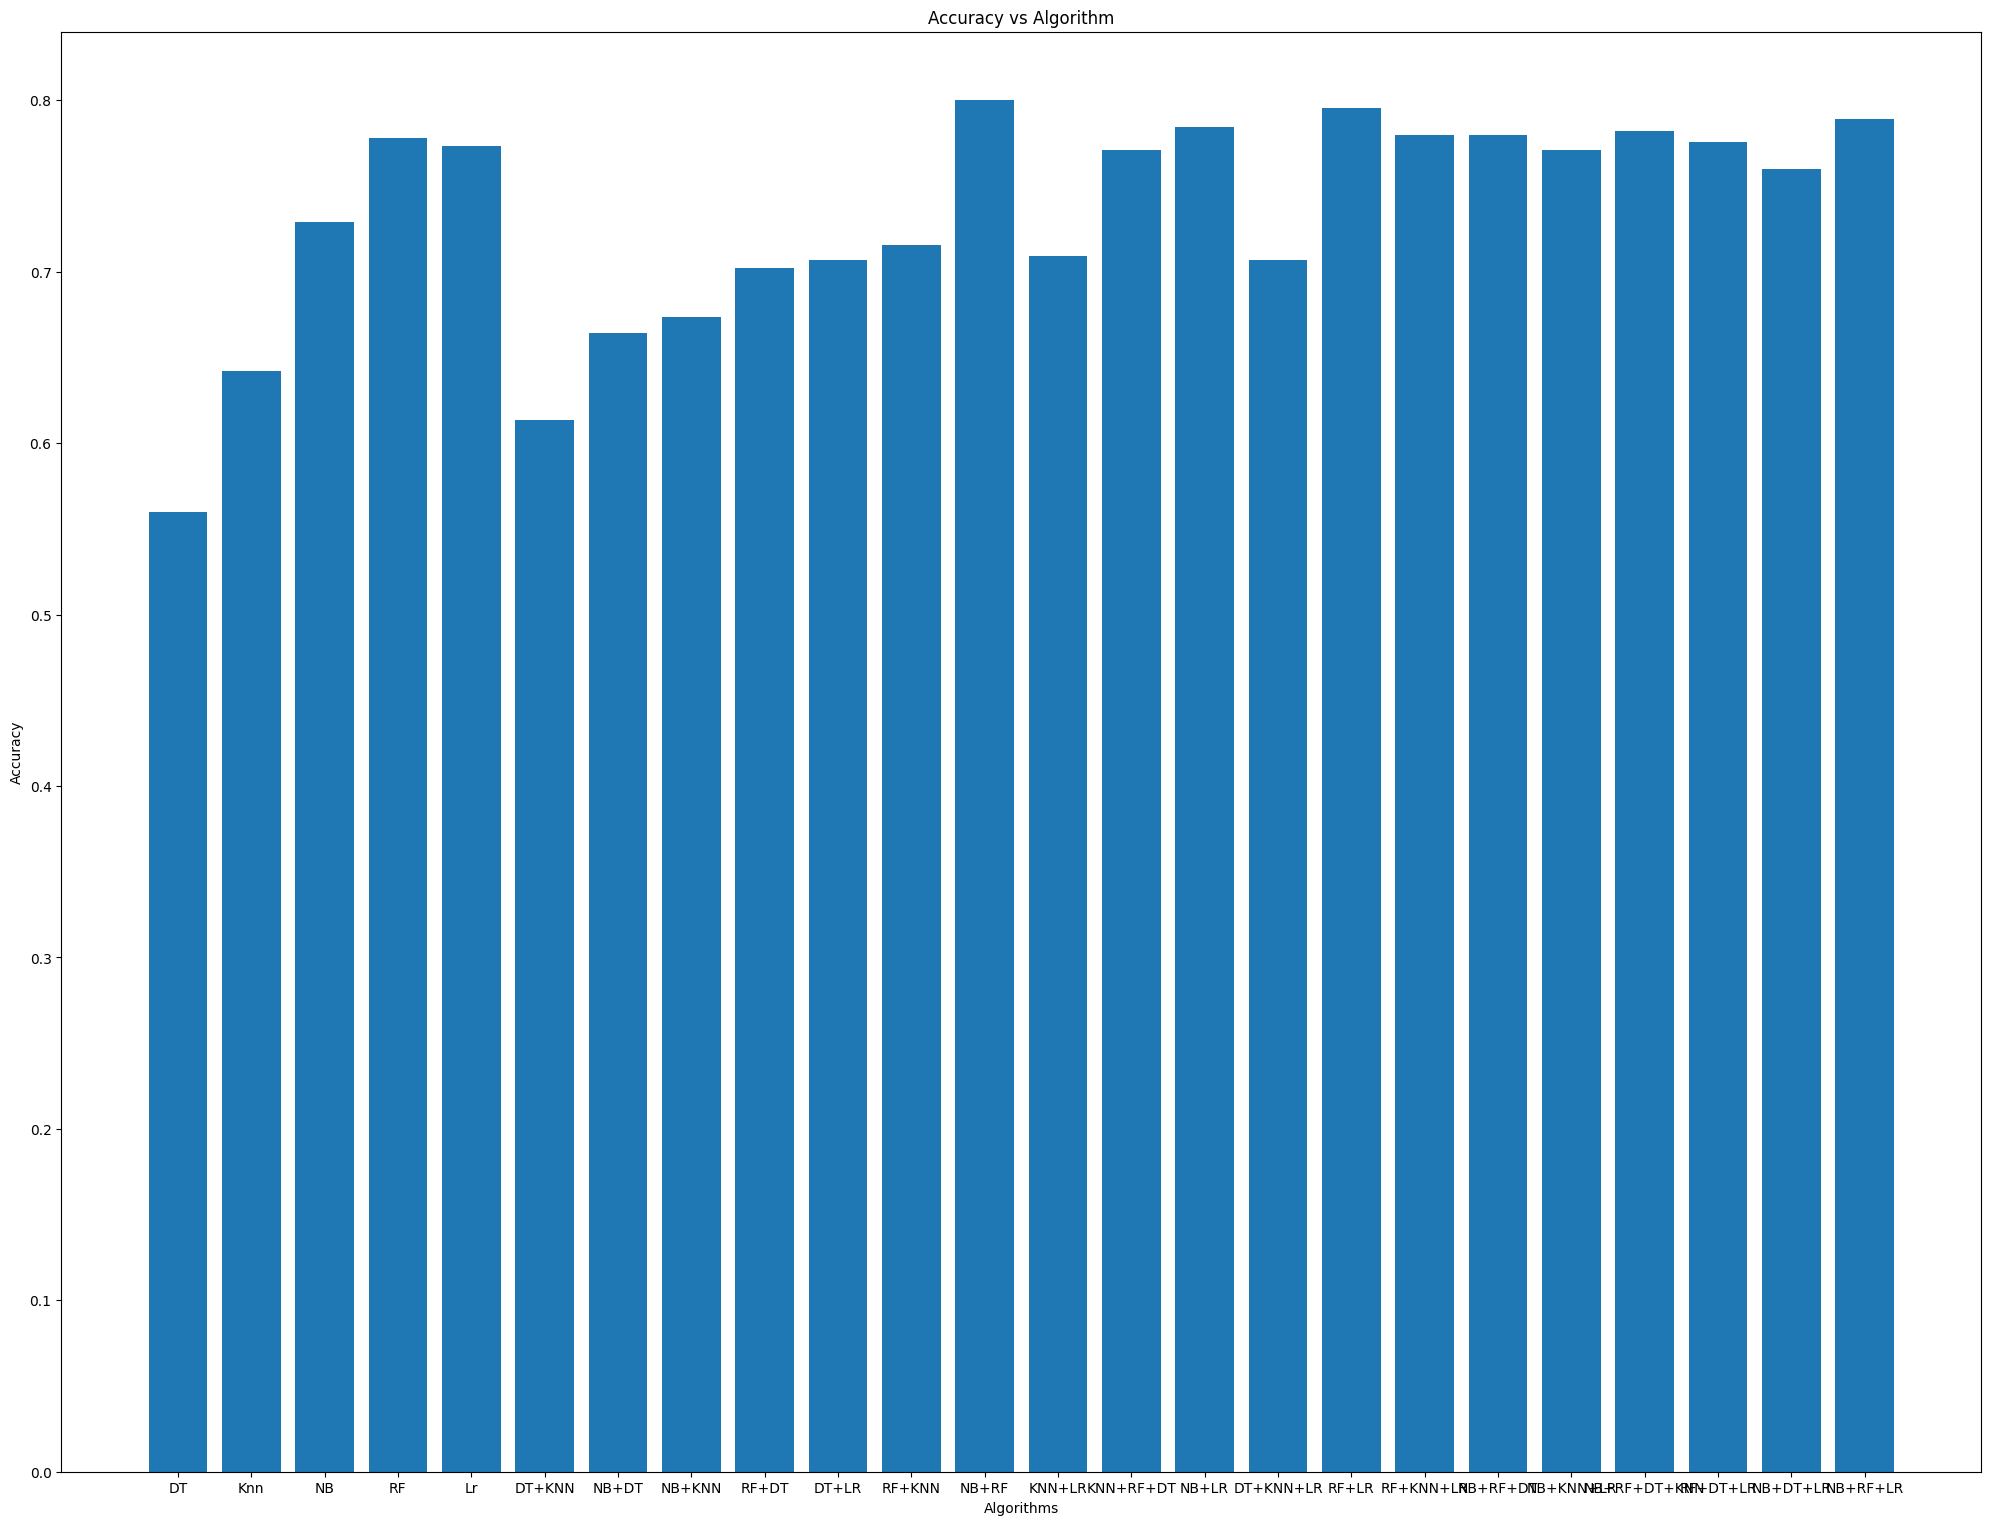

In [58]:
fig = plt.figure()
ax = fig.add_axes([6,6,3,3])
ax.bar(AlgorithmsList,AccuracyList)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Algorithm")
plt.show()

A bar plot depicting accuracies with all the algorithms and combination of algorithms tried out.